In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Load the colorization model
net = cv2.dnn.readNetFromCaffe('colorization_deploy_v2.prototxt', 'colorization_release_v2.caffemodel')
#Load cluster centers
pts_in_hull = np.load('pts_in_hull.npy', allow_pickle=True)
# Populate cluster centers as 1x1 convolution kernel
class8= net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1)
net.getLayer (class8).blobs= [pts_in_hull.astype (np.float32)]
net.getLayer(conv8).blobs=[np. full([1, 313], 2.606, np.float32)]

#Read the input image image = cv2.imread('image1.jpg')
image=cv2.imread('image1.jpg')
#Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Convert to RGB
gray_image_rgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
#Normalize the image
normalized_image = gray_image_rgb.astype('float32') / 255.0
# Convert the image to Lab
lab_image = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2Lab)
#Resize the Lightness channel to network input size

resized_1_channel= cv2.resize(lab_image[:,:, 0], (224, 224))
resized_1_channel -=50 # Subtract 50 for mean-centering

#Predict the a and b channels
net.setInput(cv2.dnn.blobFromImage(resized_1_channel))
pred=net.forward()[0,:,:,:].transpose((1, 2, 0))

In [ ]:
resized_1_channel.shape

(224, 224)

In [ ]:
## Resizr the Predicted Image 'ab' Image to same dimensions as per our Input Image

pred_resized = cv2.resize(pred, (image.shape[1], image.shape[0]))

## Concatenate the Original L channel with the Predicted 'ab' channels

colorized_image = np.concatenate((image[:, :, 0][:, :, np.newaxis], pred_resized), axis=2)


In [ ]:
## Convert the output Image from lab to RGB
colorized_image = cv2.cvtColor(colorized_image, cv2.COLOR_Lab2BGR)
colorized_image = np.clip(colorized_image, 0, 1)

In [ ]:
## Convert the Image to 8-bit
colorized_image = (255 * colorized_image).astype("uint8")

(-0.5, 1279.5, 1023.5, -0.5)

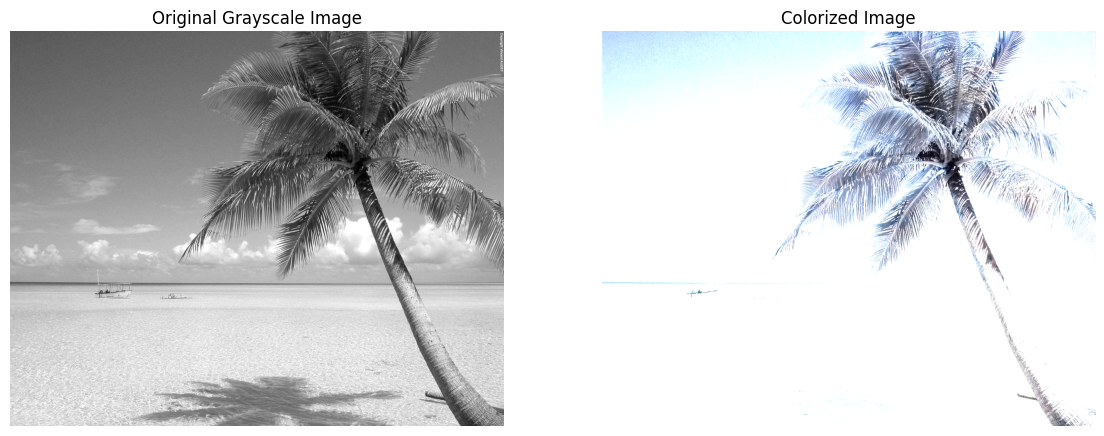

In [ ]:
## Show both the original grayscale and colorized Image using Matplotlib
plt.figure(figsize=(14,7))

## Display Original Grayscale Image
plt.subplot(1,2,1)
plt.imshow(gray_image,cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

## Display Colorized Image
plt.subplot(1,2,2)
colorized_image_rgb=cv2.cvtColor(colorized_image,cv2.COLOR_BGR2RGB)
plt.imshow(colorized_image_rgb)
plt.title('Colorized Image')
plt.axis('off')
